# NBA Data Analysis in Pandas: The Power of Multi-Indexed Data Frames

#### SUMMARY: In this post I create data frames that summarize and/or aggregate various NBA statistics based on permutations of categorical variables (not combinations because order matters!).

#### TAKEAWAY: Muli-indexed data frames combined with grouping, aggregating, and sorting functions can serve as powerful tools for exploratory data analysis.  

#### MAIN STEPS: $$\\$$ (1) Split - I use the groupby() function to the split data into chunks based on a permutation of variables. $$\\$$ (2) Apply - I input the values in each chunk into an aggregating function that outputs a summary data object. $$\\$$ (3) Combine - All the summary data objects are stored in a multi-indexed data frame. $$\\$$ (4) Explore - The new data frame is examined and its contents is used to create data visualizations. $$\\$$

I've been working on my data mining project for the past couple of days, and have learned quite a bit about multi-indexed data frames. As a way to solidify my understanding, I created a short summary of some of the things I've been able to accomplish. 

In [9]:
#Import all necessary modules:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from ggplot import *

#Change some IPython settings:
pd.set_option('display.max_columns', 100)

#Read in data:
teams = pd.read_csv('teams.csv', index_col = [0])
games = pd.read_csv('games.csv',index_col = False, parse_dates = [1])
players = pd.read_csv('players.csv', index_col = False)
gameStats = pd.read_csv('gameStats.csv', index_col = False, parse_dates = [2])
games.index = games.game_id

## 1) Comparing Monthly Player Statistics

Here, I create a dataframe that contains a bunch of descriptive statistics (aka mean, std, etc.) of player statistics, broken down by month. After creating this data frame, I can efficiently manipulate the player comparison visualization shown below. 

In [10]:
#poss_agg_funcs = ['count', 'median','mean','std','var','sum','max','min', 'first','last', 'mode'] #possible aggregate functions
agg_funcs = ['mean','std','max','sum']
pl_vars1 = ['game_id', 'player', 'player_id', 'team','team_id']
pl_vars2 = ['AST', 'BLK', 'DREB','MIN', 'OREB', 'PF', '+/-', 'PTS', 'REB', 'STL', 'TO', 
            '3PM', '3PA','FGM', 'FGA', 'FTM', 'FTA']

#Create aggregator (aka a dictionary defining the aggregate function to be applied onto each column):
dict1 = {'team': lambda col: list(set(col)),
         'team_id': lambda col: list(set(col)),
         'game_id': 'count'}
dict2 = dict([tuple([col_name, agg_funcs]) for col_name in pl_vars2])
dict1.update(dict2)
pl_mapping = dict1

#Create Player Stats Summary Data Frame for 2015:
tempids = games.loc[games.season == 2015, 'game_id'].values
crit1 = players.game_id.map(lambda x: x in tempids)
players.index = players.game_id
players['date'] = games.date
players = players.reset_index(drop = True)
players['period'] = players.date.dt.to_period('M')

pl_groupPerm = ['period','player']
playerStats2015_bymonth = players[crit1].groupby(pl_groupPerm).agg(pl_mapping)

In [12]:
playerStats2015 = players[crit1].groupby('player').agg(pl_mapping)
playerStats2015.head()

TO                           MIN                      \
                     mean       std max  sum       mean       std max   sum   
player                                                                        
a.j.-price       0.541667  0.721060   2   13  12.833333  7.475564  25   308   
aaron-brooks     1.863014  1.272738   5  136  22.369863  7.032675  37  1633   
aaron-gordon     0.842105  0.886119   3   32  15.210526  5.827047  30   578   
adreian-payne    1.095238  1.410842   5   23  21.428571  8.634648  37   450   
al-farouq-aminu  0.718750  0.999504   4   46  17.390625  7.947481  31  1113   

                      STL                         FTA                     \
                     mean       std max sum      mean       std max  sum   
player                                                                     
a.j.-price       0.291667  0.550033   2   7  1.000000  1.841549   7   24   
aaron-brooks     0.561644  0.686907   3  41  2.164384  2.179537   8  158   
aaron-gordon     0.368421  0.541322   2  14  1.368421  1.403106   5   52   
adreian-payne    0.523810  0.749603   2  11  1.523810  1.631534   4   32   
al-farouq-aminu  0.984375  1.385780   6  63  1.390625  1.839748   7   89   

                     team_id       3PM                          BLK            \
                    <lambda>      mean       std max  sum      mean       std   
player                                                                          
a.j.-price       [11, 5, 23]  0.625000  0.969648   3   15  0.000000  0.000000   
aaron-brooks             [4]  1.452055  1.190718   4  106  0.191781  0.517943   
aaron-gordon            [21]  0.289474  0.565107   2   11  0.447368  0.554947   
adreian-payne        [0, 17]  0.047619  0.218218   1    1  0.238095  0.538958   
al-farouq-aminu          [6]  0.437500  0.639320   2   28  0.812500  1.139131   

                              3PA                          REB                \
                max sum      mean       std max  sum      mean       std max   
player                                                                         
a.j.-price        0   0  2.333333  1.857222   5   56  1.291667  1.301476   5   
aaron-brooks      3  14  3.698630  2.132324   8  270  1.958904  1.295702   6   
aaron-gordon      2  17  0.921053  0.969301   3   35  3.131579  1.988766   8   
adreian-payne     2   5  0.380952  0.740013   2    8  5.476190  3.370742  15   
al-farouq-aminu   6  52  1.687500  1.390158   5  108  4.218750  2.924819  12   

                     game_id      DREB                          FTM            \
                 sum   count      mean       std max  sum      mean       std   
player                                                                          
a.j.-price        31      32  1.041667  1.232853   5   25  0.666667  1.274044   
aaron-brooks     143      73  1.602740  1.187197   5  117  1.821918  1.835926   
aaron-gordon     119      43  2.394737  1.763588   6   91  0.973684  1.150484   
adreian-payne    115      31  3.857143  2.434866  10   81  1.047619  1.321975   
al-farouq-aminu  270      70  2.906250  2.106066  10  186  1.015625  1.527444   

                               +/-                           AST            \
                max  sum      mean        std max  sum      mean       std   
player                                                                       
a.j.-price        5   16 -2.166667   6.578401  17  -52  1.708333  1.627993   
aaron-brooks      7  133  2.027397  10.333297  26  148  3.123288  2.107824   
aaron-gordon      4   37 -3.526316   8.554237  20 -134  0.552632  0.724004   
adreian-payne     4   22 -5.190476   7.839764  10 -109  0.571429  0.810643   
al-farouq-aminu   6   65  2.359375   7.756957  26  151  0.687500  0.731925   

                              OREB                         FGM                \
                max  sum      mean       std max sum      mean       std max   
player                                                   

Then, by changing the two lists (player_to_compare and stats_to_compare) below, I can quickly change the players and the statistics that I would like to visually compare. Below, I compare three players' monthly averages of rebounds, points, and assists. Some things I found interesting from these graphs: (1) Although Chris Paul may not score as many points as Westbrook or James, he makes up for it in assists. (2) As of late, Russell Westbrook has been dominant, improving in all three stats in question. This is likely because the Thunder picked up their pace at the end of the season in the hopes of making the playoffs. 

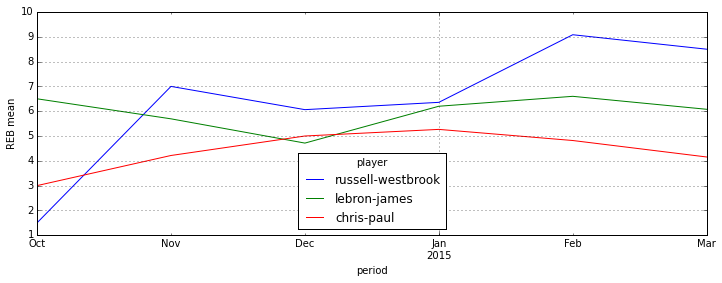

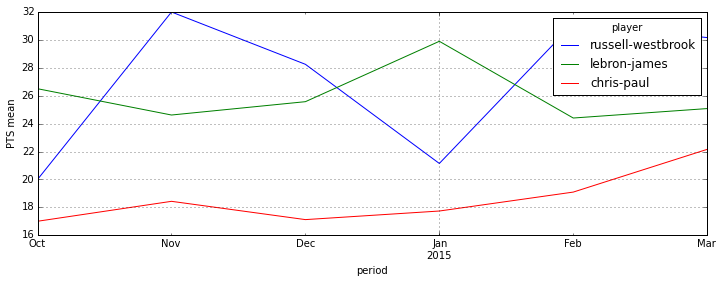

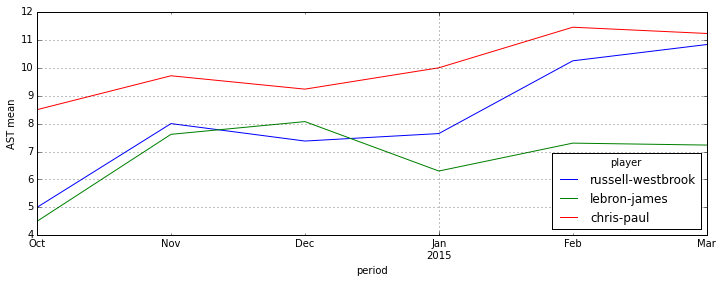

In [333]:
players_to_compare = ['russell-westbrook', 'lebron-james','chris-paul']
stats_to_compare = {'PTS':'mean', 'REB':'mean','AST':'mean'}

for key,val in stats_to_compare.iteritems():
    ax = playerStats2015_bymonth.unstack()[key][val][players_to_compare].plot(figsize = (12,4))
    ax.set_ylabel(key + ' ' + val)

## 2) Comparing Yearly Team Statistics

I performed a similar exercise on team statistics, which allowed me to compare teams' performance over the past ten years. 

In [334]:
#Creating a summary data frame with all of the game metrics and their various descriptive statistics:
agg_funcs = ['mean','std','max','sum']

gs_vars1 = ['game_id', 'h_or_a', 'date', 'season', 'team', 'team_id']
gs_vars2 = ['home_01', 'win_01']
gs_vars3 = ['PTSF', 'PTSA', 'AST', 'BLK', 'DREB', 'OREB', 'REB', 'MIN', 'PF', 'STL', 'TO', 
            '3PM', '3PA', 'FGM', 'FGA', 'FTM', 'FTA','+/-']
gs_vars4 = ['PTS_diff', 'PACE', 'AST_ratio', 'DEF_eff', 'OFF_eff', 'FGP_adj', 'TO_rate', 
            'DREB_p', 'OREB_p', 'FT_rate']

dict1 = {'game_id': 'count',
         'win_01': ['mean','sum']}
dict2 = dict([tuple([col_name, agg_funcs]) for col_name in gs_vars3])
dict3 = dict([tuple([col_name, agg_funcs]) for col_name in gs_vars4])
dict1.update(dict2)
dict1.update(dict3)
gs_mapping = dict1

#Create gameStats_derivs data frame
gs_groupPerm
gameStats_derivs = gameStats.groupby(gs_groupPerm).agg(gs_mapping)

Below, I compare the yearly performance of four teams across three metrics: defensive rebound percentage, assist ratio, and number of wins. Some interesting things to notice: (1) The recent improvement of the performance of the Golden State Warriors, (2) the drop in the  performance of the Cleveland Cavaliers after Lebron James left in 2010, and (3) the dominance of the Spurs over the past ten years

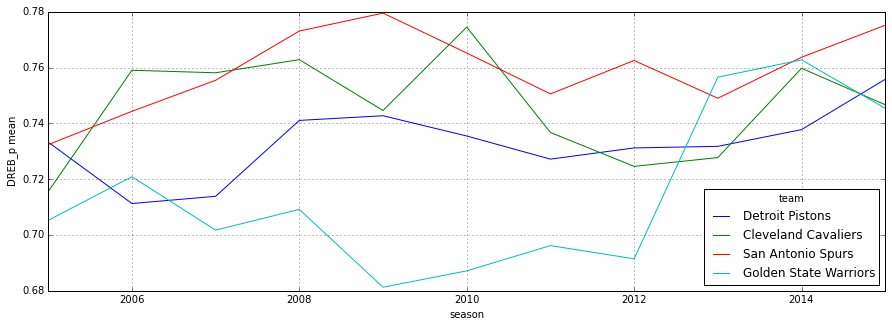

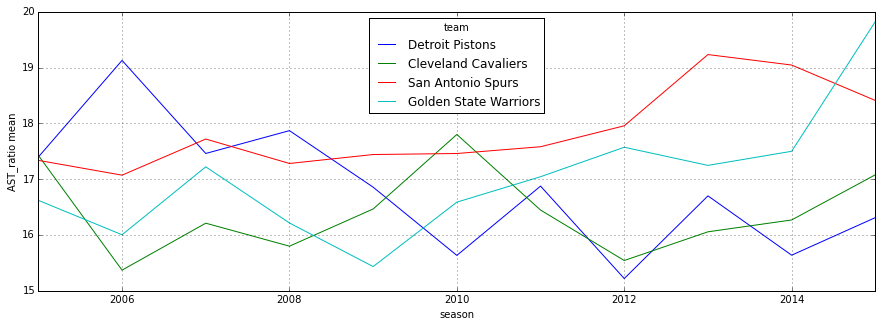

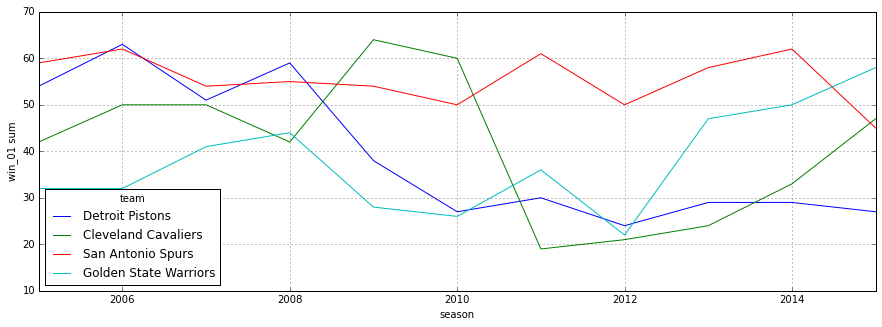

In [335]:
teams_to_compare = ['Detroit Pistons', 'Cleveland Cavaliers', 'San Antonio Spurs', 'Golden State Warriors']
stats_to_compare = {'win_01':'sum', 'DREB_p':'mean','AST_ratio':'mean'}

for key,val in stats_to_compare.iteritems():
    ax = gameStats_derivs.unstack()[key][val][teams_to_compare].plot(figsize = (15,5))
    ax.set_ylabel(key + ' ' + val)

## Comparing the Statistics of The Decade's Best Teams

The mult-index format of the data frame containing all these summary data objects makes it very convenient to find patterns across combinations of categorical and/or numerical variables.

Say I wanted to compare the statistics of the top five best teams from the previous ten years. 

I first sort the data frame by a team's number of wins in a season. This allows me to easily compare the statistics of the decade's top teams. A popular comparison is between the 2008 Boston Celtics (back when they had KG, Pierce, and Allen) and the 2013 Miami Heat (with Lebron, Wade, and Bosh). The table below allows you to compare various season statistics to determine each team's relatives strengths and weaknesses. 

In [344]:
gameStats_derivs.sort(('win_01','sum'),ascending = False).applymap(lambda x: round(x,2)).head(5)

AST_ratio                           MIN             \
                                mean   std    max      sum    mean   std  max   
season team                                                                     
2013   Miami Heat              18.57  2.77  25.82  1522.45  242.46  9.35  290   
2007   Dallas Mavericks        16.09  3.54  26.11  1286.86  238.88  7.84  286   
2008   Boston Celtics          17.68  3.44  24.41  1414.22  241.03  5.16  267   
2009   Cleveland Cavaliers     16.47  2.75  23.07  1317.31  241.35  5.53  266   
       Los Angeles Lakers      17.47  3.24  25.73  1397.65  241.30  6.73  290   

                                    STL                FGP_adj              \
                              sum  mean   std max  sum    mean   std   max   
season team                                                                  
2013   Miami Heat           19882  8.66  2.70  15  710    0.55  0.06  0.71   
2007   Dallas Mavericks     19110  6.85  2.66  14  548    0.51  0.06  0.63   
2008   Boston Celtics       19282  8.47  3.09  20  678    0.52  0.06  0.69   
2009   Cleveland Cavaliers  19308  7.17  3.17  18  574    0.52  0.05  0.64   
       Los Angeles Lakers   19304  8.79  2.91  16  703    0.51  0.06  0.62   

                                     FTA                 DEF_eff         \
                              sum   mean   std max   sum    mean    std   
season team                                                               
2013   Miami Heat           45.43  23.01  6.57  41  1887  104.77  10.97   
2007   Dallas Mavericks     40.86  24.81  7.34  45  1985  104.83  13.00   
2008   Boston Celtics       41.90  26.68  7.43  46  2134   99.81  12.12   
2009   Cleveland Cavaliers  41.41  24.76  6.72  41  1981  103.21  11.37   
       Los Angeles Lakers   41.15  25.48  8.65  46  2038  105.39  10.26   

                                               FGM                   BLK  \
                               max      sum   mean   std max   sum  mean   
season team                                                                
2013   Miami Heat           124.55  8590.76  38.39  4.49  56  3148  5.38   
2007   Dallas Mavericks     149.52  8386.13  36.30  4.91  48  2904  5.03   
2008   Boston Celtics       132.87  7985.19  36.35  4.82  49  2908  4.59   
2009   Cleveland Cavaliers  125.06  8257.14  36.63  4.26  48  2930  5.34   
       Los Angeles Lakers   126.41  8430.86  40.26  4.99  54  3221  5.10   

                                             3PA                    REB        \
                             std max  sum   mean   std max   sum   mean   std   
season team                                                                     
2013   Miami Heat           2.59  14  441  22.06  5.90  41  1809  38.61  7.09   
2007   Dallas Mavericks     2.16  11  402  16.73  5.26  33  1338  41.51  6.55   
2008   Boston Celtics       2.23   9  367  19.05  5.00  33  1524  41.91  6.06   
2009   Cleveland Cavaliers  2.31  11  427  20.50  4.83  33  1640  42.31  5.40   
       Los Angeles Lakers   2.67  13  408  18.51  4.23  34  1481  43.76  6.44   

                                     game_id   DREB                    FTM  \
                           max   sum   count   mean   std max   sum   mean   
season team                                                                  
2013   Miami Heat           54  3166      82  30.37  5.53  44  2490  17.35   
2007   Dallas Mavericks     58  3321      80  30.46  5.33  41  2437  20.04   
2008   Boston Celtics       55  3353      80  31.84  5.42  43  2547  20.54   
2009   Cleveland Cavaliers  53  3385      80  31.45  4.82  44  2516  18.74   
       Los Angeles Lakers   67  3501      80  31.40  4.64  41  2512  19.55   

                                           OFF_eff ...  FT_rate              \
                             std max   sum    mean ...     mean   std   max   
season team                                        ...                        
2013   Miami Heat           4.95